In [1]:
import os

import numpy as np
import pandas as pd
from importlib import reload

from src import constants as Con

from src.predictive_modeling.answer_correctness.answer_correctness_data import (
    build_trial_level_with_area_metrics_for_correctness,
)
from src.predictive_modeling.answer_correctness.answer_correctness_models import (
    MajorityBaselineCorrectness,
    AreaMetricsCorrectnessLogRegModel,
)
from src.predictive_modeling.answer_correctness.answer_correctness_eval import (
    evaluate_models_on_answer_correctness,
)
from src.predictive_modeling.answer_correctness.answer_correctness_viz import (
    show_correctness_model_results,
)
from src.predictive_modeling.common.viz_utils import plot_confusion_heatmap

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [3]:
correctness_models = [
    MajorityBaselineCorrectness(),
    AreaMetricsCorrectnessLogRegModel(
        name="correctness_log_reg+lastloc",
        include_last_location=True,
    ),
    AreaMetricsCorrectnessLogRegModel(
        name="correctness_log_reg+nolastloc",
        include_last_location=False,
    ),
]


In [4]:
results_hunters_corr = evaluate_models_on_answer_correctness(
    df=hunters,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID, Con.TEXT_ID_WITH_Q_COLUMN),
    split_group_col=Con.PARTICIPANT_ID,
    test_size=0.2,
    random_state=42,
    builder_fn=build_trial_level_with_area_metrics_for_correctness,
)

show_correctness_model_results(results_hunters_corr)

MODEL: majority_baseline
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.874
Positive (correct) trials: 1700
Negative (incorrect) trials: 244

Confusion Matrix:
        pred_0  pred_1
true_0       0     244
true_1       0    1700

MODEL: correctness_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.730
Positive (correct) trials: 1700
Negative (incorrect) trials: 244

Confusion Matrix:
        pred_0  pred_1
true_0     110     134
true_1     390    1310

MODEL: correctness_log_reg+nolastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.725
Positive (correct) trials: 1700
Negative (incorrect) trials: 244

Confusion Matrix:
        pred_0  pred_1
true_0     105     139
true_1     396    1304



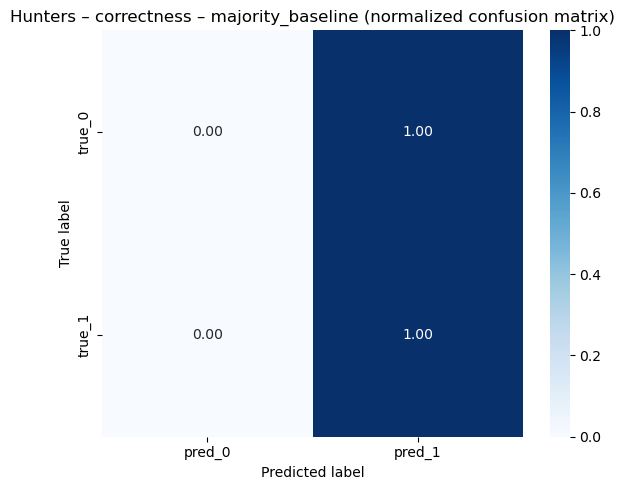

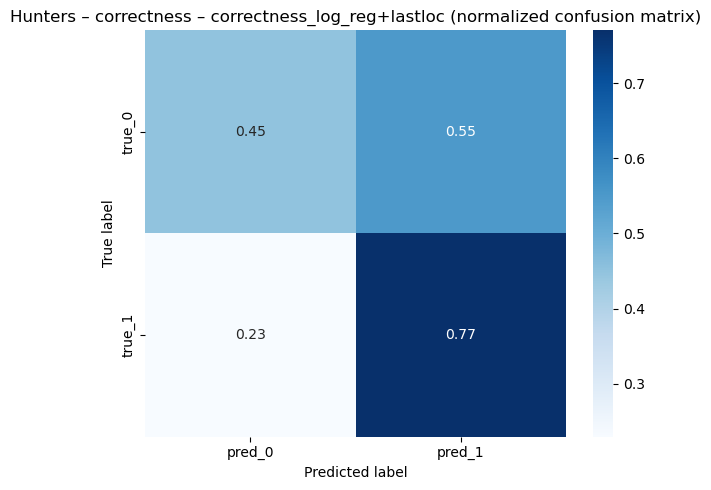

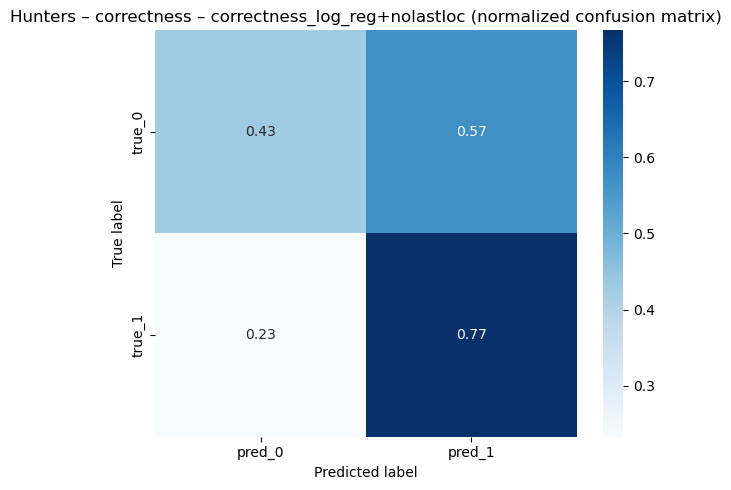

In [5]:
for name, res in results_hunters_corr.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1),
        include_minus1=False,
        normalize=True,
        title=f"Hunters – correctness – {name} (normalized confusion matrix)",
    )

In [6]:
results_gatherers_corr = evaluate_models_on_answer_correctness(
    df=gatherers,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID, Con.TEXT_ID_WITH_Q_COLUMN),
    split_group_col=Con.PARTICIPANT_ID,
    test_size=0.2,
    random_state=42,
    builder_fn=build_trial_level_with_area_metrics_for_correctness,
)

show_correctness_model_results(results_gatherers_corr)

MODEL: majority_baseline
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.844
Positive (correct) trials: 1640
Negative (incorrect) trials: 304

Confusion Matrix:
        pred_0  pred_1
true_0       0     304
true_1       0    1640

MODEL: correctness_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.716
Positive (correct) trials: 1640
Negative (incorrect) trials: 304

Confusion Matrix:
        pred_0  pred_1
true_0     110     194
true_1     358    1282

MODEL: correctness_log_reg+nolastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.718
Positive (correct) trials: 1640
Negative (incorrect) trials: 304

Confusion Matrix:
        pred_0  pred_1
true_0     111     193
true_1     355    1285



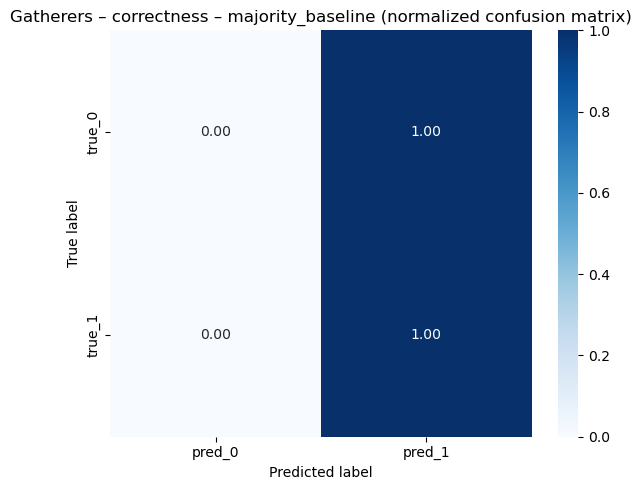

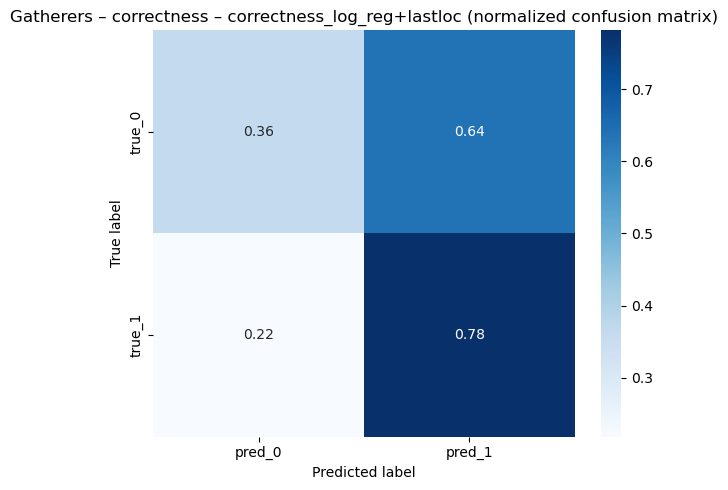

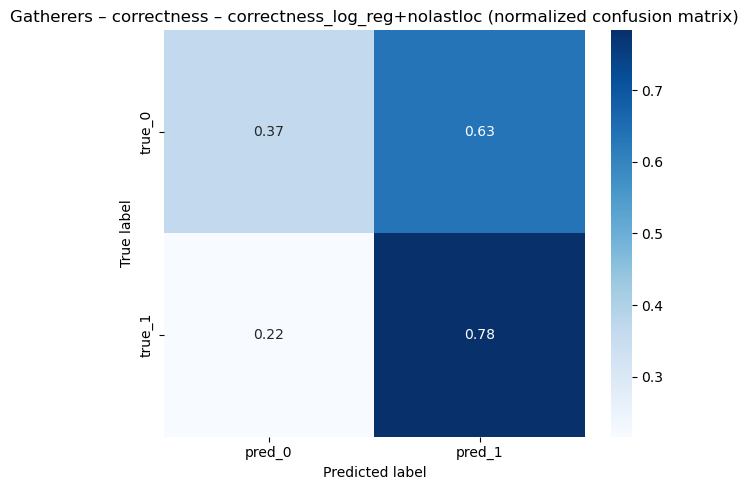

In [7]:
for name, res in results_gatherers_corr.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1),
        include_minus1=False,
        normalize=True,
        title=f"Gatherers – correctness – {name} (normalized confusion matrix)",
    )